In [58]:

import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns           
import os

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import statsmodels.api as sm

import os




df_0 = pd.read_csv('prices_round_3_day_0.csv', sep=';')
df_1 = pd.read_csv('prices_round_3_day_1.csv', sep=';')
df_2 = pd.read_csv('prices_round_3_day_2.csv', sep=';')


for i, df in enumerate([df_0, df_1, df_2]):
    df['timestamp'] = df['timestamp'] / 100 + i * 10000


df = pd.concat([df_0, df_1])
df = pd.concat([df, df_2])
df = df.set_index('timestamp')
print(df)

def basket_spread(products_df):


    chocolates = products_df[products_df['product'] == 'CHOCOLATE']['mid_price']
    strawberries = products_df[products_df['product'] == 'STRAWBERRIES']['mid_price']
    roses = products_df[products_df['product'] == 'ROSES']['mid_price']
    gift_basket = products_df[products_df['product'] == 'GIFT_BASKET']['mid_price']

    spread = gift_basket - (4*chocolates +6*strawberries + roses)

    print(spread)
    print('SPREAD AVG:', spread.mean())
    print('SPREAD STD:', spread.std())

basket_spread(df.iloc[20000:30000])

           day       product  bid_price_1  bid_volume_1  bid_price_2  \
timestamp                                                              
0.0          0     CHOCOLATE         7999           111          NaN   
0.0          0  STRAWBERRIES         3999           210          NaN   
0.0          0         ROSES        14999            72          NaN   
0.0          0   GIFT_BASKET        71348            19      71347.0   
1.0          0   GIFT_BASKET        71344             1      71343.0   
...        ...           ...          ...           ...          ...   
29998.0      2   GIFT_BASKET        69537             2      69536.0   
29999.0      2     CHOCOLATE         7749           143          NaN   
29999.0      2   GIFT_BASKET        69551             1      69550.0   
29999.0      2  STRAWBERRIES         3984           240          NaN   
29999.0      2         ROSES        14411            59          NaN   

           bid_volume_2  bid_price_3  bid_volume_3  ask_price_1

In [60]:
 basket_spread(df)

timestamp
0.0        355.0
1.0        346.5
2.0        345.5
3.0        343.5
4.0        339.0
           ...  
29995.0    222.0
29996.0    218.5
29997.0    222.5
29998.0    222.5
29999.0    237.5
Name: mid_price, Length: 30000, dtype: float64
SPREAD AVG: 379.4904833333333
SPREAD STD: 76.4243821737498


In [61]:
df.head(5)

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0.0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
0.0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
0.0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
0.0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
1.0,0,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0


In [62]:
chocolates = df[df['product'] == 'CHOCOLATE']['mid_price']
strawberries = df[df['product'] == 'STRAWBERRIES']['mid_price']
roses = df[df['product'] == 'ROSES']['mid_price']
gift_basket = df[df['product'] == 'GIFT_BASKET']['mid_price']
spread =  gift_basket - (4*chocolates +6*strawberries + roses)


In [63]:
df['spread'] = spread

In [64]:
df['spread']

timestamp
0.0        355.0
0.0        355.0
0.0        355.0
0.0        355.0
1.0        346.5
           ...  
29998.0    222.5
29999.0    237.5
29999.0    237.5
29999.0    237.5
29999.0    237.5
Name: spread, Length: 120000, dtype: float64

In [65]:
df.tail(5)

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,spread
timestamp,,,,,,,,,,,,,,,,,
29998.0,2,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,69542.0,0.0,222.5
29999.0,2,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0,237.5
29999.0,2,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,69556.0,0.0,237.5
29999.0,2,STRAWBERRIES,3984,240,NaN,NaN,NaN,NaN,3985,92,3986.0,148.0,NaN,NaN,3984.5,0.0,237.5
29999.0,2,ROSES,14411,59,NaN,NaN,NaN,NaN,14412,59,NaN,NaN,NaN,NaN,14411.5,0.0,237.5


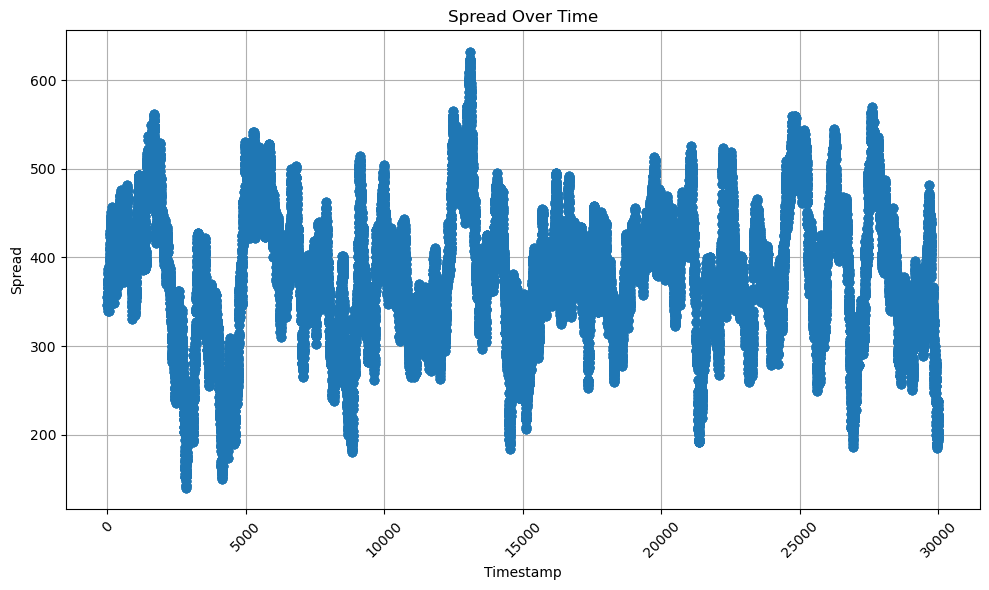

In [66]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data provided

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['spread'], marker='o', linestyle='-')
plt.title('Spread Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Spread')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [67]:
data = pd.DataFrame({'Chocolates': chocolates, 'Strawberries': strawberries, 'Roses': roses, 'Gift_Basket': gift_basket, 'Spread': spread})


In [68]:
# Calculate correlation
correlation_matrix = data.corr()

# Print correlation matrix
print(correlation_matrix)

              Chocolates  Strawberries     Roses  Gift_Basket    Spread
Chocolates      1.000000      0.273545  0.826358     0.947339 -0.095121
Strawberries    0.273545      1.000000  0.148667     0.498003  0.022371
Roses           0.826358      0.148667  1.000000     0.850830 -0.048108
Gift_Basket     0.947339      0.498003  0.850830     1.000000  0.057554
Spread         -0.095121      0.022371 -0.048108     0.057554  1.000000


In [69]:
# Chocolates com Roses e Gift Basket
data

,Chocolates,Strawberries,Roses,Gift_Basket,Spread
timestamp,,,,,
0.0,8000.0,4000.0,15000.0,71355.0,355.0
1.0,8001.5,3999.5,15000.0,71349.5,346.5
2.0,8001.0,3999.5,15000.5,71347.0,345.5
3.0,8002.5,3999.5,15000.0,71350.5,343.5
4.0,8002.0,3999.5,14997.5,71341.5,339.0
...,...,...,...,...,...
29995.0,7750.5,3983.5,14409.5,69534.5,222.0
29996.0,7750.5,3983.5,14408.0,69529.5,218.5
29997.0,7750.5,3984.5,14411.5,69543.0,222.5


In [70]:
import statsmodels.tsa.stattools as ts
result = ts.coint(data['Chocolates'],data['Roses'])
cointegration_t_statistic = result[0]
p_val = result[1]
criticalvalues_test_1_5_10 = result[2]

In [71]:
#queremos p-val < 0,05
p_val


0.09391665614622141

In [72]:
import statsmodels.tsa.stattools as ts
result = ts.coint(data['Chocolates'],data['Gift_Basket'])
cointegration_t_statistic = result[0]
p_val = result[1]
criticalvalues_test_1_5_10 = result[2]

In [73]:
#queremos p-val < 0,05
p_val


0.07987947236850212

In [75]:
import statsmodels.tsa.stattools as ts
result = ts.coint(data['Roses'],data['Gift_Basket'])
cointegration_t_statistic = result[0]
p_val = result[1]
criticalvalues_test_1_5_10 = result[2]

In [77]:
#queremos p-val < 0,05
p_val


0.010191378268802342

In [78]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = ts.coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [79]:
find_cointegrated_pairs(data)

(array([[ 0.        , -0.90369738, -3.07270952, -3.14358665, -0.44452315],
        [ 0.        ,  0.        , -1.24529974, -1.83746781, -0.96271131],
        [ 0.        ,  0.        ,  0.        , -3.89147339, -2.96639444],
        [ 0.        ,  0.        ,  0.        ,  0.        , -0.33915826],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
 array([[1.        , 0.91964343, 0.09391666, 0.07987947, 0.96805471],
        [1.        , 1.        , 0.84563643, 0.61135061, 0.90969416],
        [1.        , 1.        , 1.        , 0.01019138, 0.11841119],
        [1.        , 1.        , 1.        , 1.        , 0.97400091],
        [1.        , 1.        , 1.        , 1.        , 1.        ]]),
 [('Roses', 'Gift_Basket')])

Text(0.5, 1.0, 'Spreead between Gift_Basket - Spread')

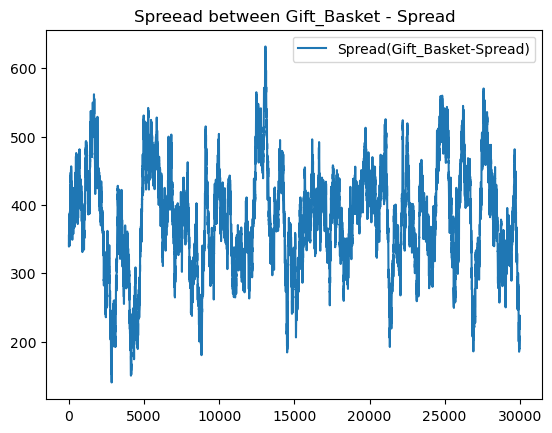

In [81]:
plt.plot(spread, label = 'Spread(Gift_Basket-Spread)' )
plt.legend()
plt.title('Spreead between Gift_Basket - Spread')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Spread')

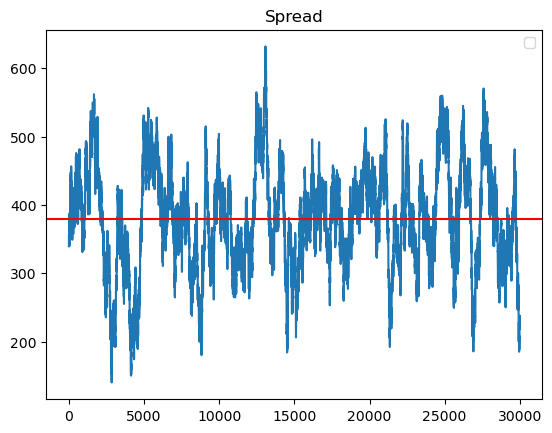

In [82]:
# Also, we can take a look at the price ratios between the two time series.
plt.plot(spread)
plt.axhline(spread.mean(), color='red')
plt.legend()
plt.title("Spread")

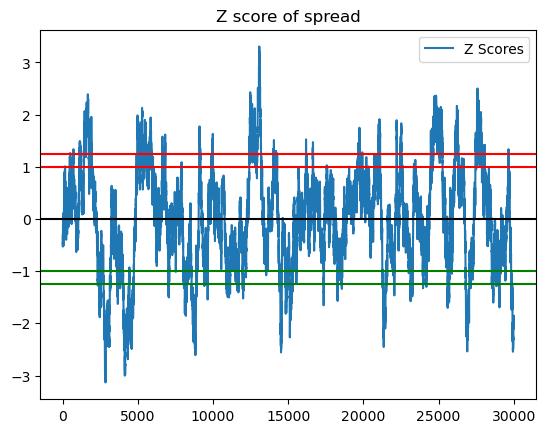

In [83]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
# Calculate the Zscores of each row.
df_zscore = (spread - spread.mean())/spread.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of spread')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

In [85]:

train = spread[0:round(0.8*len(spread))]
test = spread[round(0.8*len(spread)):]
len(train) + len(test) == len(spread)

False

In [86]:
len(train)

24001

In [87]:
len(test)

6000

In [88]:
24001/6000

4.000166666666667

timestamp
0.0             NaN
1.0             NaN
2.0             NaN
3.0             NaN
4.0             NaN
             ...   
29995.0    1.140649
29996.0    0.779371
29997.0    0.514744
29998.0    0.118443
29999.0    0.131500
Name: mid_price, Length: 30000, dtype: float64


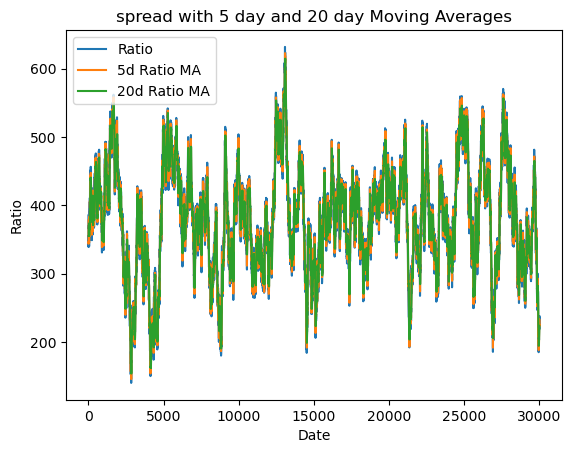

In [89]:
ratios_mavg5 = spread.rolling(window=5, center=False).mean()
ratios_mavg20 = spread.rolling(window=20, center=False).mean()
std_20 = spread.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
print(zscore_20_5)
plt.plot(spread.index, spread.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('spread with 5 day and 20 day Moving Averages')
plt.show()

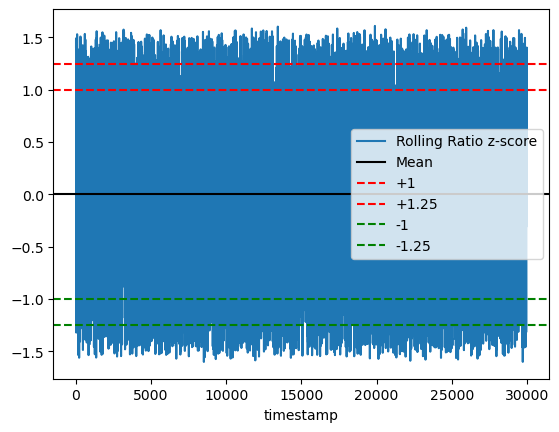

In [90]:

zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

In [91]:
zscore_20_5.mean()

-0.014537547862001182

In [92]:
# Assuming you have already defined and split your data into 'train' and 'test'

# Define trading strategy thresholds
lower_bound = -1.25
upper_bound = 1.25
position = None  # Track current position (None for no position, 'long' for long position, 'short' for short position)
pnl = 0  # Track cumulative profit and loss

# Generate trading signals and calculate PNL
for i in range(len(test)):
    if df_zscore.iloc[i] < lower_bound:
        if position != 'long':  # Enter long position
            position = 'long'
            entry_price = test.iloc[i]
    elif df_zscore.iloc[i] > upper_bound:
        if position != 'short':  # Enter short position
            position = 'short'
            entry_price = test.iloc[i]
    elif lower_bound <= df_zscore.iloc[i] <= upper_bound:
        if position:  # Exit position
            if position == 'long':
                pnl += test.iloc[i] - entry_price
            elif position == 'short':
                pnl += entry_price - test.iloc[i]
            position = None

print("Cumulative PNL:", pnl)


Cumulative PNL: -46.0


In [93]:
import numpy as np

# Define ranges of window sizes to test
window_sizes_mavg20 = range(10, 400, 10)  # Test window sizes from 10 to 60 in steps of 10 for the 20-day moving average

# Initialize variables to track the best parameters and performance
best_pnl = float('-inf')
best_params = None

# Iterate over all combinations of window sizes
for mavg20_window in window_sizes_mavg20:
    # Calculate moving averages and z-score based on the current window sizes
    ratios_mavg20 = spread.rolling(window=mavg20_window, center=False).mean()
    std_20 = spread.rolling(window=mavg20_window, center=False).std()
    zscore = (spread - ratios_mavg20) / std_20
    
    # Initialize variables for trading
    position = None
    pnl = 0
    
    # Generate trading signals and calculate PNL
    for i in range(len(test)):
        if zscore.iloc[i] < lower_bound:
            if position != 'long':  # Enter long position
                position = 'long'
                entry_price = test.iloc[i]
        elif zscore.iloc[i] > upper_bound:
            if position != 'short':  # Enter short position
                position = 'short'
                entry_price = test.iloc[i]
        elif lower_bound <= zscore.iloc[i] <= upper_bound:
            if position:  # Exit position
                if position == 'long':
                    pnl += test.iloc[i] - entry_price
                elif position == 'short':
                    pnl += entry_price - test.iloc[i]
                position = None
        
    # Update best parameters and performance if current performance is better
    if pnl > best_pnl:
        best_pnl = pnl
        best_params =  mavg20_window

# Print the best parameters and performance
print("Best PNL:", best_pnl)
print("Best Parameters (mavg20_window):", best_params)



Best PNL: 423.5
Best Parameters (mavg20_window): 220


In [35]:
import numpy as np

lower_bound = 1.25
upper_bound = 1.25

window_sizes_mavg20 = range(10, 400, 10)  

best_pnl = float('-inf')
best_params = None

for mavg20_window in window_sizes_mavg20:

    ratios_mavg20 = spread.rolling(window=mavg20_window, center=False).mean()
    std_20 = spread.rolling(window=mavg20_window, center=False).std()
    zscore = (spread - ratios_mavg20) / std_20

    position = None
    pnl = 0

    for i in range(len(test)):
        if zscore.iloc[i] < lower_bound:
            if position != 'long':  
                position = 'long'
                entry_price = test.iloc[i]
        elif zscore.iloc[i] > upper_bound:
            if position != 'short':  
                position = 'short'
                entry_price = test.iloc[i]
        elif lower_bound <= zscore.iloc[i] <= upper_bound:
            if position:  # Exit position
                if position == 'long':
                    pnl += test.iloc[i] - entry_price
                elif position == 'short':
                    pnl += entry_price - test.iloc[i]
                position = None

    if pnl > best_pnl:
        best_pnl = pnl
        best_params = mavg20_window

print("Best PNL:", best_pnl)
print("Best Parameter (mavg20_window):", best_params)



Best PNL: 0
Best Parameter (mavg20_window): 10


In [94]:
import numpy as np

lower_bound = 1.25
upper_bound = 1.25

window_sizes_mavg20 = range(10, 400, 10)  

best_pnl = float('-inf')
best_params = None

for mavg20_window in window_sizes_mavg20:

    ratios_mavg20 = spread.rolling(window=mavg20_window, center=False).mean()
    std_20 = spread.rolling(window=mavg20_window, center=False).std()
    zscore = (spread - ratios_mavg20) / std_20

    position = None
    pnl = 0

    for i in range(len(test)):
        if zscore.iloc[i] < lower_bound:
            if position != 'long':  
                position = 'long'
                entry_price = test.iloc[i]
        elif zscore.iloc[i] > upper_bound:
            if position != 'short':  
                position = 'short'
                entry_price = test.iloc[i]
        elif lower_bound <= zscore.iloc[i] <= upper_bound:
            if position:  # Exit position
                if position == 'long':
                    pnl += test.iloc[i] - entry_price
                elif position == 'short':
                    pnl += entry_price - test.iloc[i]
                position = None

    if pnl > best_pnl:
        best_pnl = pnl
        best_params = mavg20_window

print("Best PNL:", best_pnl)
print("Best Parameter (mavg20_window):", best_params)



Best PNL: 0
Best Parameter (mavg20_window): 10
